In [21]:
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from joblib import dump
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
X_train = pd.read_csv("../../../Split Data/Training Dataset/X_train #1.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../../Split Data/Training Dataset/y_train #1.csv", index_col=0)
X_val = pd.read_csv("../../../Split Data/Validation Dataset/X_val #1.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../../Split Data/Validation Dataset/y_val #1.csv", index_col=0)
X_test = pd.read_csv("../../../Split Data/Testing Dataset/X_test #1.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../../Split Data/Testing Dataset/y_test #1.csv", index_col=0)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)   
X_test_scaled = scaler.transform(X_test) 

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                    max_iter=1000, random_state=10, verbose = 1)


In [5]:
mlp.fit(X_train_scaled, y_train)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.43742703
Iteration 2, loss = 0.42666609
Iteration 3, loss = 0.42420235
Iteration 4, loss = 0.42286465
Iteration 5, loss = 0.42141838
Iteration 6, loss = 0.42023899
Iteration 7, loss = 0.41928222
Iteration 8, loss = 0.41887829
Iteration 9, loss = 0.41810846
Iteration 10, loss = 0.41739026
Iteration 11, loss = 0.41693488
Iteration 12, loss = 0.41663448
Iteration 13, loss = 0.41615771
Iteration 14, loss = 0.41582495
Iteration 15, loss = 0.41547913
Iteration 16, loss = 0.41531350
Iteration 17, loss = 0.41504706
Iteration 18, loss = 0.41484449
Iteration 19, loss = 0.41459604
Iteration 20, loss = 0.41465183
Iteration 21, loss = 0.41422173
Iteration 22, loss = 0.41424984
Iteration 23, loss = 0.41398158
Iteration 24, loss = 0.41389889
Iteration 25, loss = 0.41370670
Iteration 26, loss = 0.41356705
Iteration 27, loss = 0.41343724
Iteration 28, loss = 0.41327210
Iteration 29, loss = 0.41318415
Iteration 30, loss = 0.41301568
Iteration 31, loss = 0.41299481
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=10,
              verbose=1)

In [19]:
y_val_pred = mlp.predict(X_val_scaled)

In [22]:
Accuracy = metrics.accuracy_score(y_val, y_val_pred)
Precision = metrics.precision_score(y_val, y_val_pred)
Recall = metrics.recall_score(y_val, y_val_pred)
F1_score = metrics.f1_score(y_val, y_val_pred)


In [23]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8178183218315908, 'Precision': 0.5875188674335086, 'Recall': 0.7205872965209065, 'F1_score': 0.6472848213773726}


In [24]:
y_pred = mlp.predict(X_test_scaled)

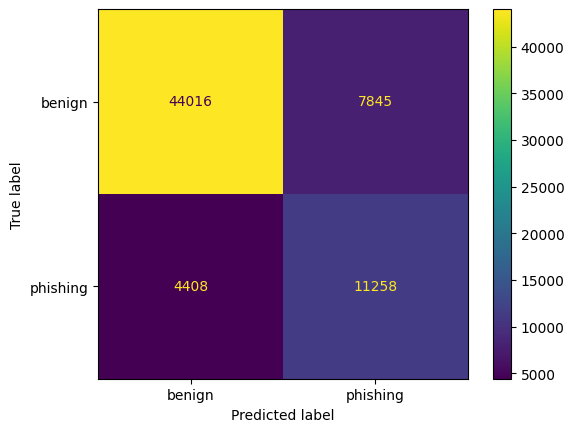

In [25]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [26]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [27]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8185466554119093, 'Precision': 0.5893315186096425, 'Recall': 0.7186263245244479, 'F1_score': 0.6475883689493515}


In [28]:
df = pd.read_csv("../Metrics of Dataset #1.csv")

In [33]:
metrics = pd.DataFrame({"Model": "MLP", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [34]:
df = pd.concat([df, metrics], ignore_index=True)

In [35]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.718824,0.433593,0.692072,0.533156
1,Random Forest,0.824603,0.604040,0.708222,0.651995
2,XGBoost,0.811364,0.574300,0.722329,0.639864
3,MLP,0.818547,0.589332,0.718626,0.647588


In [36]:
df.to_csv("../Metrics of Dataset #1.csv", index=False)

In [37]:
dump(mlp, 'MLP #1.joblib')

['MLP #1.joblib']